In [3]:
import numpy as np
import matlab.engine
import math

mle = matlab.engine.start_matlab('-desktop')

In [17]:
mle.quit()

extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extension: -1
extens

In [4]:
STOP_TIME = 35
START_TIME = 0

In [5]:
#how to call
tunableParams = {
    'current_height': 0.0,
    'current_vel':0.0,
    'current_pitch':0.0,
    'extension_length':0.0,
    'temperature': 10.0
}

results = mle.sim_the_model('Stoptime',STOP_TIME,"StartTime",START_TIME,'TunableParameters',tunableParams)

In [6]:
def getApogee(result_matlab):
    velocity_data = result_matlab['velocity']['Data']
    velocity_time = result_matlab['velocity']['Time']
    height_data = result_matlab['height']['Data']
    height_time = result_matlab['height']['Time']

    #find time when apogee hit
    apogee_index = -1
    for i in range(0,len(velocity_data)):
        if (velocity_data[i][0]<=0 and i>1):
            apogee_index = i
            break
            
    if (apogee_index != -1):
        #find time when apogee hit
        apogee_time = velocity_time[apogee_index][0]
        return height_data[apogee_index][0]
    else:
        return -1 #INVALID APOGEE
    

In [7]:
print(getApogee(results))

5171.09454840472


In [8]:
#No airbrake deployment
#max height: 7092m
#height at burn out: 1500m
#vel at burnout: 620m/s


23751 entries
vel: 260 -> 0
height: 700 -> 4105
extension: 0.0 -> 0.02543 (lookup table in int percentage)

(261 x 228) lookup table

__   |  h   700 715 730 ... 3400 .... 4105
v
260
259
258
.
.
.
0

In [9]:
MAX_EXTENSION = 0.02543
ERROR_THRESHOLD = 5
TARGET_APOG = 4114.8
STOP_TIME = 35
START_TIME = 5
#MAX_CALLS = 10

In [10]:
def get_extension(curr_vel, curr_alt,target):
    #find apogee when no extension yet
    params = {
        'current_height': curr_alt,
        'current_vel':curr_vel,
        'current_pitch':0.0,
        'extension_length':0.0
    }

    #0% extension
    result = mle.sim_the_model('Stoptime',STOP_TIME,"StartTime", START_TIME,'TunableParameters',params)
    curr_apog = getApogee(result)
    
    #already undershooting
    if curr_apog<target:
        return 0
    else:
        return 100

    #100% extension
    # params['extension_length']= MAX_EXTENSION
    # result = mle.sim_the_model('Stoptime',STOP_TIME,"StartTime", START_TIME,'TunableParameters',params)
    # curr_apog = getApogee(result)
    # #print("curr apogee w 100% extension = " + str(curr_apog))

    # #already undershooting
    # if curr_apog>target:
    #     return 100

    #find best extension w binary search
    # low = 0
    # hi = 100
    # num_calls = 0
    
    # while (low<hi and num_calls<MAX_CALLS):
    #     print("doing a BS")
    #     mid = (low+hi)/2
    #     params['extension_length']= (mid/100.0)*MAX_EXTENSION
    #     result = mle.sim_the_model('Stoptime',STOP_TIME,"StartTime", START_TIME,'TunableParameters',params)
    #     curr_apog = getApogee(result)
    #     if (abs(curr_apog-target)<=ERROR_THRESHOLD):
    #         return math.floor(mid)
    #     elif (curr_apog<target):
    #         #smaller extension
    #         hi = mid
    #     else:
    #         low=mid
    #     num_calls+=1
    # return 0

In [1]:
LUT_1D = [0]*261

In [11]:
curr_extension = get_extension(float(230),float(2000),TARGET_APOG)

In [12]:
print(curr_extension)

100


In [ ]:
#do this in PARTS!!!!
for i in range(0,261):
    for j in range(0,228):
        vel = float(260 - i*1)
        height = float(700 + j*15)
        
        try:
            curr_extension = get_extension(float(vel),float(height),TARGET_APOG)
        except:
            curr_extension = -1
        LUT[i][j] = curr_extension
        
        if (j==10):
            print("vel: "+str(vel) + " height: "+str(height) + " extension: " + str(curr_extension))

curr apogee w no extension = 3330.060609132131
curr apogee w no extension = 3358.8368916048667
curr apogee w no extension = 3387.6121569853467
curr apogee w no extension = 3416.3686495859097
curr apogee w no extension = 3445.1754960076155
curr apogee w no extension = 3473.927691484857
curr apogee w no extension = 3502.6522143348043
curr apogee w no extension = 3531.3696946902223
curr apogee w no extension = 3560.08644126531
curr apogee w no extension = 3588.770002759632
curr apogee w no extension = 3617.452393475059
vel: 260.0 height: 1000.0 extension: 0
curr apogee w no extension = 3646.132760610322
curr apogee w no extension = 3674.781032415763
curr apogee w no extension = 3703.428826465691
curr apogee w no extension = 3732.1505122123235
curr apogee w no extension = 3760.779583247994
curr apogee w no extension = 3789.407791587125
curr apogee w no extension = 3818.035665612064
curr apogee w 100% extension = 3817.050513936405
curr apogee w no extension = 3846.637391753623
curr apogee w

Error using sim_the_model
Program interruption (Ctrl-C) has been detected.



curr apogee w no extension = 4160.864651542096
curr apogee w 100% extension = 4160.164737519693
curr apogee w no extension = 4189.378895211752
curr apogee w 100% extension = 4188.702625010854
curr apogee w no extension = 4217.893301960841
curr apogee w 100% extension = 4217.240553087602
curr apogee w no extension = 4246.467362209104
curr apogee w 100% extension = 4245.838709137451
curr apogee w no extension = 4274.966653961813
curr apogee w 100% extension = 4274.361251150102
curr apogee w no extension = 4303.466233619438
curr apogee w 100% extension = 4302.883961396206
curr apogee w no extension = 4331.966100615843
curr apogee w 100% extension = 4331.4068401034365
curr apogee w no extension = 4360.445315767488
curr apogee w 100% extension = 4359.906826836088
curr apogee w no extension = 4388.915163104526
curr apogee w 100% extension = 4388.399537424319
curr apogee w no extension = 4417.385410732174
curr apogee w 100% extension = 4416.892531625936
curr apogee w no extension = 4445.85605

In [13]:
def produce_vals(low, hi, n):
    prev_j = STARTING_COL
    
    for i in range(low, hi):
        j = prev_j
        while (j<228):
            vel = float(260 - i)
            height = float(700 + j*15)
            
            try:
                curr_extension = get_extension(vel,height,TARGET_APOG)
            except:
                curr_extension = -1
                
            LUT[i][j] = curr_extension  
            if (LUT[i][j]==0):
                break
                
            print("running: i: "+ str(i) + " j: " + str(j)+ " extension: "+str(LUT[i][j]))
            j-=1
            
        

    
    path = "LUT4_"+ str(n) +".csv"
    with open(path,"w+") as my_csv:
        csvWriter = csv.writer(my_csv,delimiter=',')
        csvWriter.writerows(LUT)

In [16]:
LUT = [[0]*228 for _ in range(261)]

In [19]:
produce_vals(129,259,3)

running: i: 129 j: 227 extension: 100
running: i: 129 j: 226 extension: 100
running: i: 129 j: 225 extension: 100
running: i: 129 j: 224 extension: 100
running: i: 129 j: 223 extension: 100
running: i: 129 j: 222 extension: 100
running: i: 129 j: 221 extension: 100
running: i: 129 j: 220 extension: 100
running: i: 129 j: 219 extension: 100
running: i: 129 j: 218 extension: 100
running: i: 129 j: 217 extension: 100
running: i: 129 j: 216 extension: 100
running: i: 129 j: 215 extension: 100
running: i: 129 j: 214 extension: 100
running: i: 129 j: 213 extension: 100
running: i: 129 j: 212 extension: 100
running: i: 129 j: 211 extension: 100
running: i: 129 j: 210 extension: 100
running: i: 129 j: 209 extension: 100
running: i: 129 j: 208 extension: 100
running: i: 129 j: 207 extension: 100
running: i: 129 j: 206 extension: 100
running: i: 129 j: 205 extension: 100
running: i: 129 j: 204 extension: 100
running: i: 129 j: 203 extension: 100
running: i: 129 j: 202 extension: 100
running: i: 

NameError: name 'csv' is not defined

In [22]:
path = "LUT4_FINAL.csv"
with open(path,"w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(LUT)

In [20]:
import threading
import csv

In [29]:
t1 = threading.Thread(target=produce_vals, args=(0, 64,1))
t2 = threading.Thread(target=produce_vals, args=(64, 129,2))
t3 = threading.Thread(target=produce_vals, args=(129, 194,3))
t4 = threading.Thread(target=produce_vals, args=(194, 259,4))

t1.start()
t2.start()
t3.start()
t4.start()

produce_vals(259, 261, 5)

i: 64 j: 0 extension: 0
i: 0 j: 0 extension: 0
i: 194 j: 0 extension: 0
i: 129 j: 0 extension: 0
i: 259 j: 0 extension: 0
i: 64 j: 1 extension: 0
i: 0 j: 1 extension: 0
i: 194 j: 1 extension: 0
i: 129 j: 1 extension: 0
i: 259 j: 1 extension: 0
i: 64 j: 2 extension: 0
i: 0 j: 2 extension: 0
i: 194 j: 2 extension: 0
i: 129 j: 2 extension: 0
i: 259 j: 2 extension: 0
i: 64 j: 3 extension: 0
i: 0 j: 3 extension: 0
i: 194 j: 3 extension: 0
i: 129 j: 3 extension: 0
i: 259 j: 3 extension: 0
i: 64 j: 4 extension: 0
i: 0 j: 4 extension: 0
i: 194 j: 4 extension: 0
i: 129 j: 4 extension: 0
i: 259 j: 4 extension: 0
i: 64 j: 5 extension: 0
i: 0 j: 5 extension: 0
i: 194 j: 5 extension: 0
i: 129 j: 5 extension: 0
i: 259 j: 5 extension: 0
i: 64 j: 6 extension: 0
i: 0 j: 6 extension: 0
i: 194 j: 6 extension: 0
i: 129 j: 6 extension: 0
i: 259 j: 6 extension: 0
i: 64 j: 7 extension: 0
i: 0 j: 7 extension: 0
i: 194 j: 7 extension: 0
i: 129 j: 7 extension: 0
i: 259 j: 7 extension: 0
i: 64 j: 8 extension: 0


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv

csv_file = 'LUT3_FINAL.csv'

# Initialize an empty list to store the rows
LUT_orig = []

# Open the CSV file and read its contents
with open(csv_file, newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        # Convert each row of strings to a list of numbers
        row_numbers = [int(item) for item in row]
        # Append the list of numbers to the nested array
        LUT_orig.append(row_numbers)
        

In [38]:
csv_file = 'LUT4_FINAL.csv'

# Initialize an empty list to store the rows
LUT_offset = []

# Open the CSV file and read its contents
with open(csv_file, newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        # Convert each row of strings to a list of numbers
        row_numbers = [int(item) for item in row]
        # Append the list of numbers to the nested array
        LUT_offset.append(row_numbers)
   

In [43]:
LUT_FINAL = [[0]*228 for _ in range(261)]

for i in range(0,261):
    for j in range(0,181):
        LUT_FINAL[i][j] = LUT_orig[i][j]

for i in range(0,261):
    for j in range(181,228):
        LUT_FINAL[i][j] = LUT_offset[i][j]

with open("LUT5_FINAL_SERP2.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(LUT_FINAL)

In [2]:
import csv
LUT = []
with open("LUT5_FINAL_SERP2.csv", newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        # Convert each row of strings to a list of numbers
        row_numbers = [int(item) for item in row]
        # Append the list of numbers to the nested array
        LUT.append(row_numbers)

In [4]:
LUT_condensed = []
for i in range(0,len(LUT)):
    for j in range(0,len(LUT[0])):
        if (LUT[i][j]==100):
            LUT_condensed.append(j)
            break
        if (j==len(LUT[0])-1):
            LUT_condensed.append(len(LUT[0]))
print(LUT_condensed)

[41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 152, 153, 154, 155, 156, 157, 158, 159, 160, 160, 161, 162, 163, 164, 165, 165, 166, 167, 168, 169, 170, 170, 171, 172, 173, 174, 174, 175, 176, 177, 177, 178, 179, 180, 180, 181, 182, 183, 183, 184, 185, 186, 186, 187, 188, 188, 189, 190, 190, 191, 192, 192, 193, 194, 194, 195, 195, 196, 197, 197, 198, 199, 199, 200, 200, 201, 201, 202, 203, 203, 204, 204, 205, 205, 206, 206, 207, 207, 208, 208, 209, 209, 210, 210, 211, 211, 211, 212, 212, 213, 213, 214, 214, 214, 215, 215, 215, 216, 216, 217, 217, 217, 218, 218

In [4]:
h = 2033
v = 259
#t = 7.89
print(LUT[int(260-v)][int((h-700)/30)])

100


<Axes: title={'center': 'SERPENTINE LUT'}>

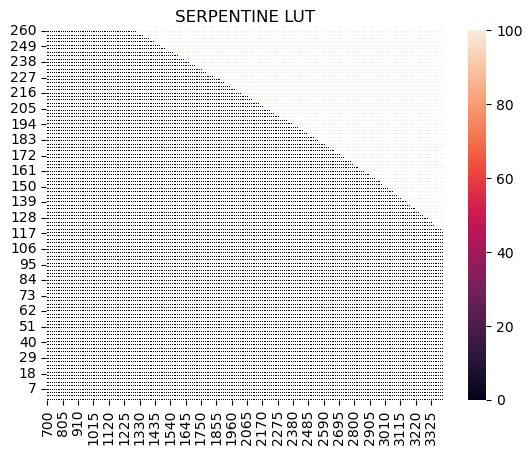

In [42]:
label_vel = [260 - i for i in range(0,261)]
#260 - i = v
#260-v = i
#row index: i = 260-v

label_height = [700 + j*15 for j in range(0,181)]
#700+15 j = h
#15 j = h - 700
#column index: j = (h-700)/15

lut_pd = pd.DataFrame(LUT_orig, index = label_vel, columns = label_height)
plt.title('SERPENTINE LUT')
plt.xlabel('height (m)')
plt.ylabel('velocity (m/s')
sns.heatmap(lut_pd, annot=False, linewidth=0.5)

In [11]:
lut_np = np.array(get_lut)
ax = sns.heatmap(lut_np, linewidth=0.5)
plt.show()

NameError: name 'get_lut' is not defined

In [114]:
#try first entry: height = 4700, vel = 260
%timeit print(get_extension(260.0,4700.0,TARGET_APOG))

curr apogee w no extension = 7305.876945744813
curr apogee w 100% extension = 7304.200383381849
100
curr apogee w no extension = 7305.876945744813
curr apogee w 100% extension = 7304.200383381849
100
curr apogee w no extension = 7305.876945744813
curr apogee w 100% extension = 7304.200383381849
100
curr apogee w no extension = 7305.876945744813
curr apogee w 100% extension = 7304.200383381849
100
curr apogee w no extension = 7305.876945744813
curr apogee w 100% extension = 7304.200383381849
100
curr apogee w no extension = 7305.876945744813
curr apogee w 100% extension = 7304.200383381849
100
curr apogee w no extension = 7305.876945744813
curr apogee w 100% extension = 7304.200383381849
100
curr apogee w no extension = 7305.876945744813
curr apogee w 100% extension = 7304.200383381849
100
479 ms ± 84.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [76]:
mle.quit()

479 ms per call min
30129 s
8.4 hrs to generate whole table :( fun

In [6]:
import csv
with open('mini_lut.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([])
    for row in x:
        writer.writerow(row)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

velocity_data = np.array(results['velocity']['Data'])
velocity_time = np.array(results['velocity']['Time'])
height_data = np.array(results['height']['Data'])
height_time = np.array(results['height']['Time'])

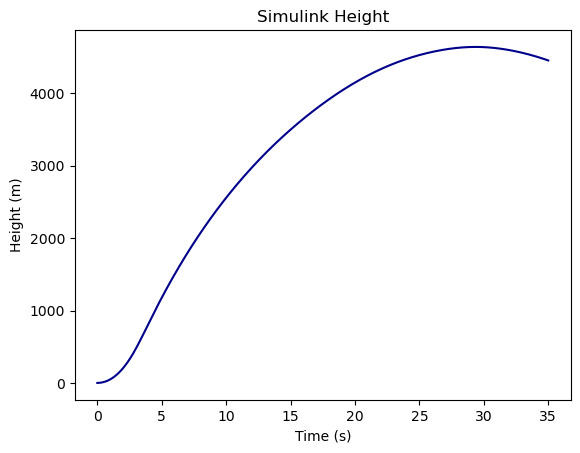

In [7]:
#plot against flight data
plt.plot(height_time, height_data, label='height', color='darkblue')   # Plot first set of curves
plt.title("Simulink Height")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")

plt.savefig('height_simulink.png')

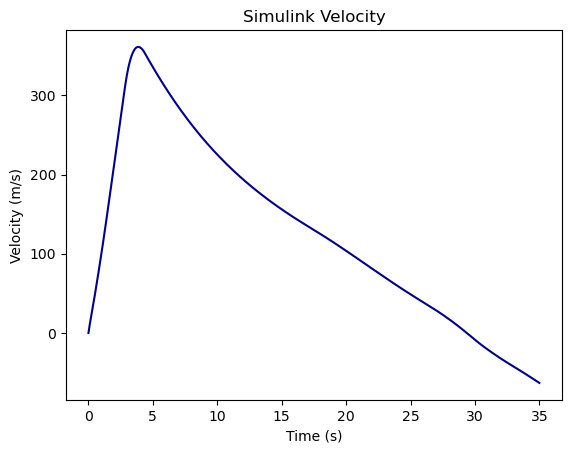

In [8]:
plt.plot(velocity_time, velocity_data, label='velocity', color='darkblue')  
plt.title("Simulink Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.savefig('velocity_simulink.png')

In [ ]:
#diff temperature, each has diff target apogees 

               |  temp (C):   25,  30,  35,  40
target apogee
        ?
        ?
       30k
        ?

In [ ]:
Fit Name: lower_pressure_LAUNCH_2

Polynomial Surface Fit (poly22)
f(x,y) = 13.7045 -67.2610 *x -1.5267e+03 *y + 265.7488*x^2 + 5.3959e+03*x*y + 2.6321e+04 * y^2

Coefficients and 95% Confidence Bounds
          Value          Lower          Upper    
p00    13.7045        10.2253        17.1836    
p10    -67.2610       -81.4887       -53.0333   
p01    -1.5267e+03    -1.8628e+03    -1.1907e+03
p20    265.7488       250.3574       281.1402   
p11    5.3959e+03     5.0328e+03     5.7591e+03 
p02    2.6321e+04     1.5054e+04     3.7589e+04 

Goodness of Fit
              Value    
SSE         1.1571e+03
R-square    0.9962    
DFE         90        
Adj R-sq    0.9960    
RMSE        3.5856    

In [ ]:
Fit Name: higher_pressure_LAUNCH_2


Polynomial Surface Fit (poly22)
f(x,y) = 21.5009 -108.5042*x -2.3580e+03 *y + 387.1197*x^2 + 7.9927e+03*x*y + 4.2631e+04*y^2

Coefficients and 95% Confidence Bounds
          Value          Lower          Upper    
p00    21.5009        16.2685        26.7332    
p10    -108.5042      -129.9016      -87.1067   
p01    -2.3580e+03    -2.8634e+03    -1.8526e+03
p20    387.1197       363.9721       410.2673   
p11    7.9927e+03     7.4466e+03     8.5389e+03 
p02    4.2631e+04     2.5686e+04     5.9577e+04 

Goodness of Fit
              Value    
SSE         2.6171e+03
R-square    0.9958    
DFE         90        
Adj R-sq    0.9956    
RMSE        5.3925    